# Copyright

<PRE>
Copyright (c) 2021 Bálint Gyires-Tóth - All Rights Reserved
You may use and modify this code for research and development purpuses.
Use this code for educational purposes (self-paced or instructor led) without the permission of the author is prohibited.
</PRE>

# Author classification
The task is to train a 1D CNN or an LSTM that is able to  classify text from two authors. The final model should be able to tell about a text with a given length (e.g. 60 characters) who wrote it. 

Please write the codes according to the following parts:

## Python module imports
Import all Python modules that you would need during the Assignment.

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix

## Data acquisition
Seek a possible dataset, you can use any source, e.g.
* http://www.gutenberg.org/
* https://www.kaggle.com/datasets
* https://paperswithcode.com/datasets
* if you would like to learn Hungarian, than e.g. https://mek.oszk.hu/

You can download the text by hand (e.g. by copy-pasting some parts into txt files) or with Python. 

In [2]:
GG_txt = ''
PAP_txt = ''

with open('GreatGatsby.txt') as f:
    GG_txt = f.read().lower().rstrip().split()
    GG_txt = ' '.join(GG_txt)

with open('PrideAndPrejudice.txt') as f:
    PAP_txt = f.read().lower().rstrip().split()
    PAP_txt = ' '.join(PAP_txt)

## Data analysis
Count the number of characters from both authors and display them on a plot (e.g. Seaborn's countplot).

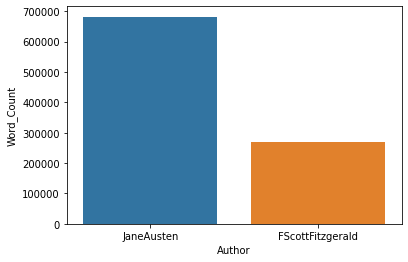

In [3]:
df_len = pd.DataFrame()

df_len['Author'] = ['JaneAusten', 'FScottFitzgerald']
df_len['Word_Count'] = [len(PAP_txt), len(GG_txt)]

sns.barplot(x="Author", y="Word_Count", data=df_len)

## Data loading, labeling and preprocessing
Load the data and convert the characters into one-hot encodings. Then load the data into a 3D NumPy array, with a shape of

* (batch, sequence_length, alphabet_length)

where sequence_length=60, and alphabet_length equals to the number of unique characters in both datasets. The sequences should be cut out from the complete dataset by sliding window. You should add 0 and 1 labels to the sequences, according to the author. 

Later you may change sequence_length to achieve better results!

In [70]:
sequence_length = 60
step = 30

alphabet_length_pre = sorted(list(set(GG_txt))) + sorted(list(set(PAP_txt)))
alphabet_length = sorted(list(set(alphabet_length_pre)))
print('Number of unique characters of the book:', len(alphabet_length))

Number of unique characters of the book: 63


In [71]:
alphabet_length
char_indices = dict((c, i) for i, c in enumerate(alphabet_length))
indices_char = dict((i, c) for i, c in enumerate(alphabet_length))

print ("Indices to char dictionary:", indices_char)


Indices to char dictionary: {0: ' ', 1: '!', 2: '$', 3: '&', 4: '(', 5: ')', 6: '*', 7: ',', 8: '-', 9: '.', 10: '0', 11: '1', 12: '2', 13: '3', 14: '4', 15: '5', 16: '6', 17: '7', 18: '8', 19: '9', 20: ':', 21: ';', 22: '?', 23: '[', 24: ']', 25: '_', 26: 'a', 27: 'b', 28: 'c', 29: 'd', 30: 'e', 31: 'f', 32: 'g', 33: 'h', 34: 'i', 35: 'j', 36: 'k', 37: 'l', 38: 'm', 39: 'n', 40: 'o', 41: 'p', 42: 'q', 43: 'r', 44: 's', 45: 't', 46: 'u', 47: 'v', 48: 'w', 49: 'x', 50: 'y', 51: 'z', 52: 'à', 53: 'ç', 54: 'é', 55: 'ê', 56: 'ô', 57: '—', 58: '‘', 59: '’', 60: '“', 61: '”', 62: '…'}


In [72]:
PAP_sentences = []
GG_sentences = []

for i in range(0, len(GG_txt)-sequence_length, step):
    GG_sentences.append(GG_txt[i:i+sequence_length])

for i in range(0, len(GG_txt)-sequence_length, step):
    PAP_sentences.append(PAP_txt[i:i+sequence_length])

print('Number of gg training samples:', len(GG_sentences))
print('Number of pap training samples:', len(PAP_sentences))
print('Number of total training samples', len(GG_sentences + PAP_sentences))


Number of gg training samples: 8928
Number of pap training samples: 8928
Number of total training samples 17856


In [73]:
X = np.zeros((len(GG_sentences) + len(PAP_sentences), sequence_length, len(char_indices)))
y = np.zeros((len(GG_sentences) + len(PAP_sentences), len(char_indices)))


In [74]:
sentences = GG_sentences + PAP_sentences

for i, sentence in enumerate(sentences[:100]):
    for t, char in enumerate(sentence):
        X[i,t,char_indices[char]] = 1
    if i < 8928:
      y[i,1] = 1
      

In [75]:
for i in y[:2]:
  print(i)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [76]:
print ("Shape of the input data:", X.shape)
print ("Shape of the target data:", y.shape)

Shape of the input data: (17856, 60, 63)
Shape of the target data: (17856, 63)


## Data splitting
Split the data into train, validate and test sets.

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Model definition
Define a 1D CNN or an LSTM for the task. Compile the model with the correct loss function.

In [78]:
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1],X_train.shape[2],)))
model.add(Dense(len(alphabet_length)))
model.add(Activation('softmax'))
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


## Model training
Train the model and apply early stopping.

In [79]:
batch_size = 128
epochs = 5

es = EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss')

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          callbacks=[es])

Epoch 1/5
75/75 [==============================] - 9s 87ms/step - loss: 0.0083 - val_loss: 0.0069
Epoch 2/5
75/75 [==============================] - 6s 79ms/step - loss: 0.0076 - val_loss: 0.0068
Epoch 3/5
75/75 [==============================] - 6s 78ms/step - loss: 0.0075 - val_loss: 0.0068
Epoch 4/5
75/75 [==============================] - 6s 80ms/step - loss: 0.0076 - val_loss: 0.0069
Epoch 5/5
75/75 [==============================] - 6s 79ms/step - loss: 0.0075 - val_loss: 0.0069


## Evaluation on test data
Evaluate the model on the test data in terms of loss and accuracy.

In [63]:
model.evaluate(X_test, y_test)

185/185 [==============================] - 2s 11ms/step - loss: 0.0092


0.009195121936500072

## Confusion matrix
Calculate and display the confusion matrix.

[Text(33.0, 0.5, 'True Label'), Text(0.5, 15.0, 'Predicted Label')]

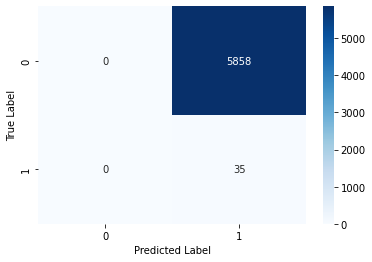

In [69]:
preds = model.predict(X_test)
y_pred = np.round(preds)

conf = confusion_matrix(y_test.argmax(axis=1), preds.argmax(axis=1))
ax = sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
ax.set(xlabel='Predicted Label', ylabel='True Label')